## Setup

In [1]:
from src.phrase_analysis import process_directory, plot_phrase_frequency_over_time_all, plot_length_distribution, analyze_files_phrase_occurrences, get_recent_contexts_all, get_per_appearance_frequency, calculate_poisson_predictions, calculate_negative_binomial_predictions, format_prediction_table
from src.regex_pattern_generator import generate_regex_patterns
from datetime import datetime

In [2]:
PHRASES = ['Zohran / Mamdani',
'JD / Vance',
'Unite / Unity',
'Ukraine',
'Trump',
'Political Violence',
'Putin',
'Palestine / Palestinian',
'National Guard',
'Israel / Israeli',
'ICE',
'Gaza',
'Future',
'Fight',
'Election',
'Economy',
'Democrat',
'Crime',
'Charlie / Kirk',
'Campaign',
'California',
'Book',
'Biden',
'Abortion',
'2028']

# PHRASES = ['Joe / Biden', # 3+ times',
#  'Election',
#  'Fight',
#  'Democracy',
#  'Doug',
#  'Fundamental',
#  'Attorney General',
#  'Education',
#  'Beautiful Bill',
#  'Charlie / Kirk',
#  'Chicago',
#  'Zohran / Mamdani',
#  'Epstein',
#  'Charlie',
#  '107 Days',
#  'Bitcoin / Crypto']

SEARCH_PHRASES = generate_regex_patterns(PHRASES)

from pprint import pprint
pprint(SEARCH_PHRASES)

{'2028': "\\b(?:\\w+-)*(?:2028|2028S|2028's|2028s'|2028S')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Abortion': "\\b(?:\\w+-)*(?:abortion|abortions|abortion's|abortions')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Biden': "\\b(?:\\w+-)*(?:biden|bidens|biden's|bidens')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Book': "\\b(?:\\w+-)*(?:book|books|book's|books')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'California': "\\b(?:\\w+-)*(?:california|californias|california's|californias')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Campaign': "\\b(?:\\w+-)*(?:campaign|campaigns|campaign's|campaigns')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Charlie / Kirk': "\\b(?:\\w+-)*(?:(?:charlie|charlies|charlie's|charlies'|kirk|kirks|kirk's|kirks'))(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Crime': "\\b(?:\\w+-)*(?:crime|crimes|crime's|crimes')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Democrat': "\\b(?:\\w+-)*(?:democrat|democrats|democrat's|democrats')(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'Economy': "\\b(?:\\w+-)*(?:economy|economies|economy's|economys'|economies')(?:-\\w+)*(?=\\W|$)[.,!?;:

In [3]:
# Set the category of interest
CATEGORY_OF_INTEREST = "interview"

# Process transcripts
df = process_directory('../data-harris/processed-transcripts', SEARCH_PHRASES)
df = df.sort_values('date')

# Filter out press briefings and state of the union
df = df[df['category'] != 'press briefing']
df = df[df['category'] != 'sotu']

# Split data by date and category
category_mask = df['category'] == CATEGORY_OF_INTEREST

# Create category of interest dataframes 
df_category = df[category_mask]

df_non_category = df[~category_mask]

# Print dataset statistics
print("Dataset Statistics:")

print(f"\nAll Transcripts:")
print(f"Total: {len(df)}")

print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
print(f"Total: {len(df_category)}")

print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
print(f"Total: {len(df_non_category)}")

print("\nWord Count Statistics:")

print(f"\nAll Transcripts:")
print(f"Average length: {df['text_length'].mean():.0f} words") 

print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
print(f"Average length: {df_category['text_length'].mean():.0f} words") 

print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
print(f"Average length: {df_non_category['text_length'].mean():.0f} words")


print("\nDate Ranges:")

print(f"\nAll Transcripts:")
print(f"Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")

print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
print(f"Date range: {df_category['date'].min().strftime('%Y-%m-%d')} to {df_category['date'].max().strftime('%Y-%m-%d')}")

print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
print(f"Date range: {df_non_category['date'].min().strftime('%Y-%m-%d')} to {df_non_category['date'].max().strftime('%Y-%m-%d')}")

Categories found in directory:
- convention
- debate
- interview
- press conference
- press gaggle
- processed-transcripts
- remarks
- speech
- vlog
Dataset Statistics:

All Transcripts:
Total: 232

Interviews:
Total: 54

Non-Interviews:
Total: 178

Word Count Statistics:

All Transcripts:
Average length: 1717 words

Interviews:
Average length: 2453 words

Non-Interviews:
Average length: 1494 words

Date Ranges:

All Transcripts:
Date range: 2019-07-11 to 2024-11-06

Interviews:
Date range: 2019-07-11 to 2024-11-05

Non-Interviews:
Date range: 2020-08-12 to 2024-11-06


## Phrase Frequency Over Time

Speeches dropped off dramatically between election day and inauguration day. Non-speech transcripts mostly don't go back as far in time (need to scrape more data)

/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:200: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(np.log10(0.1), np.log10(ymax + 0.1))



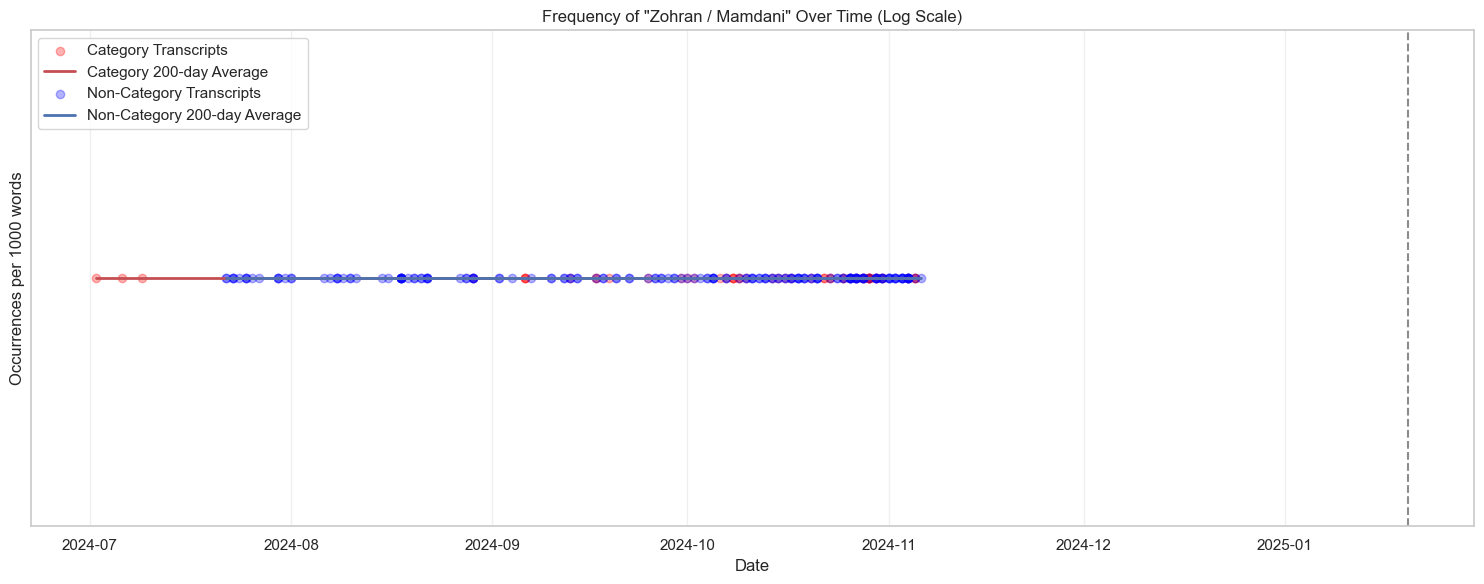


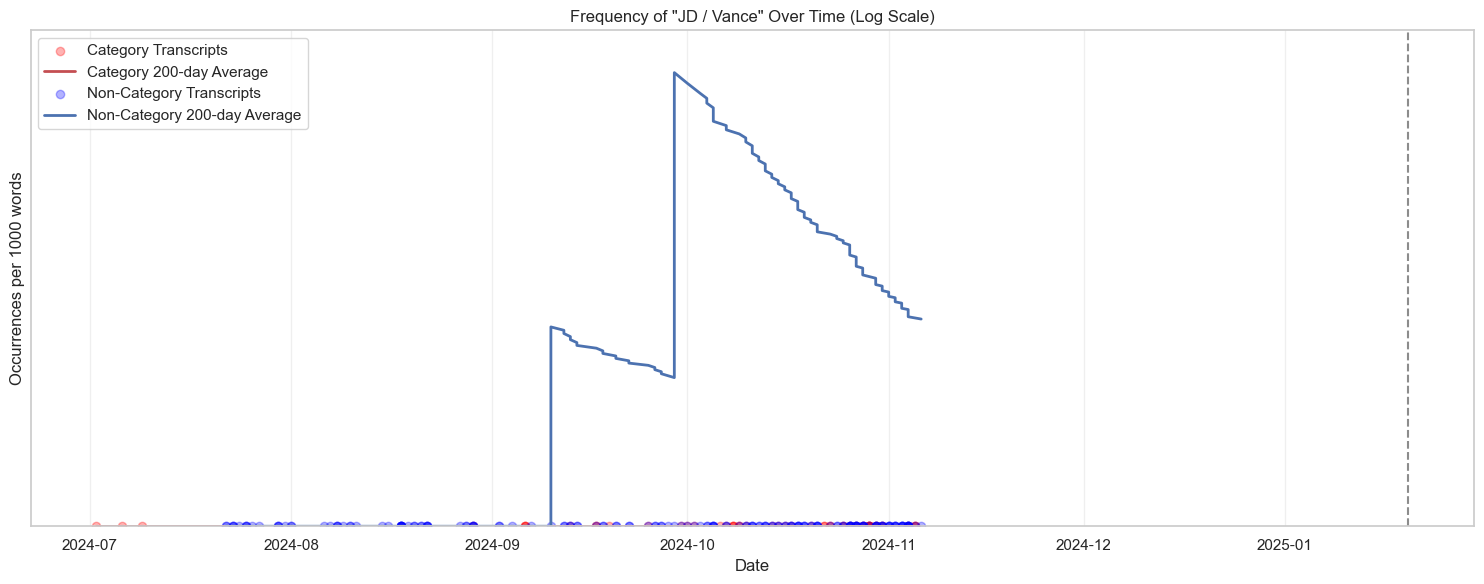


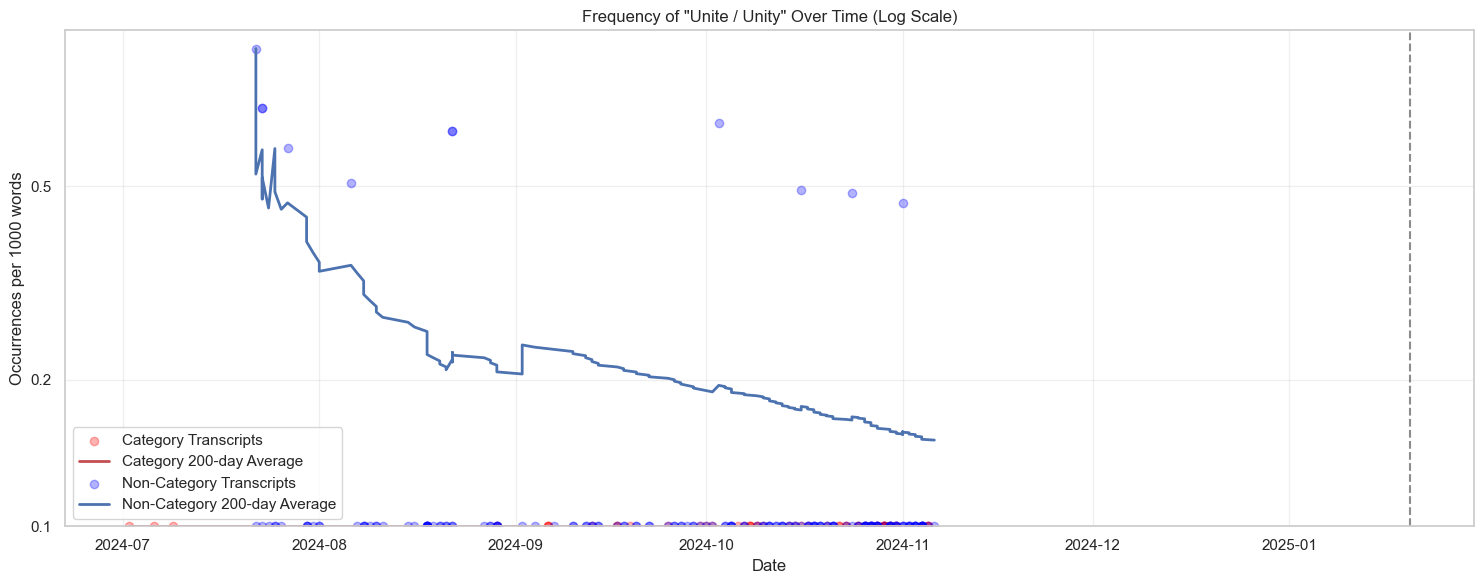


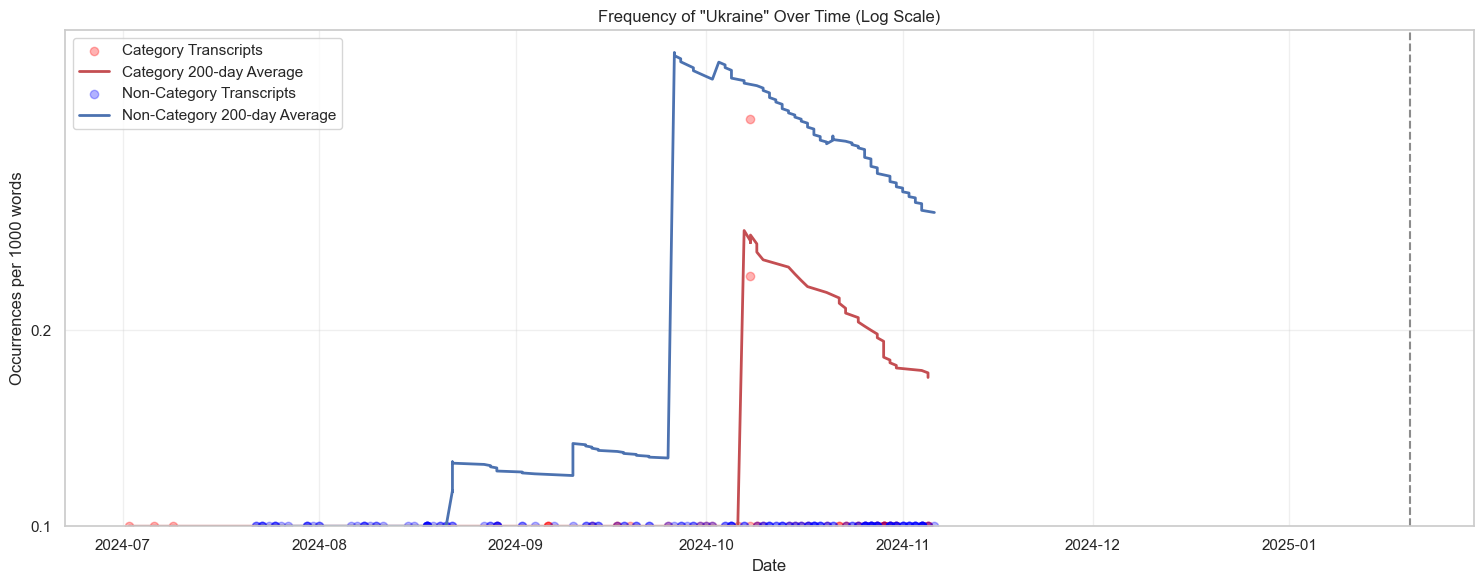


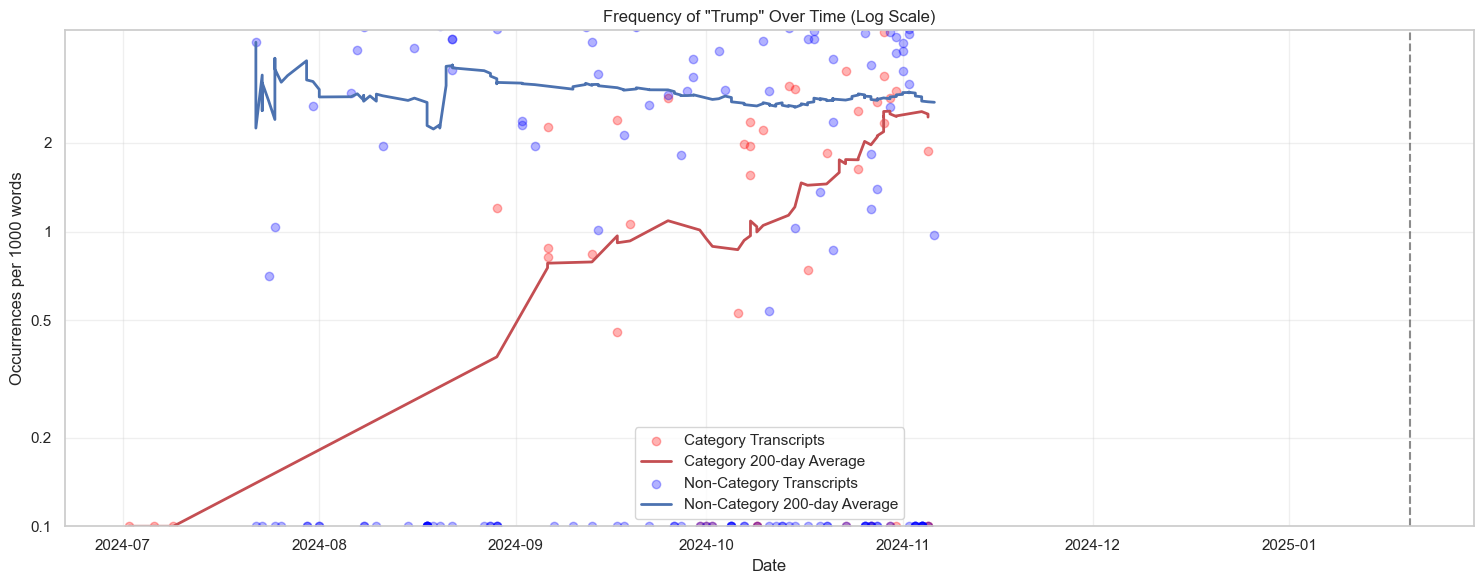


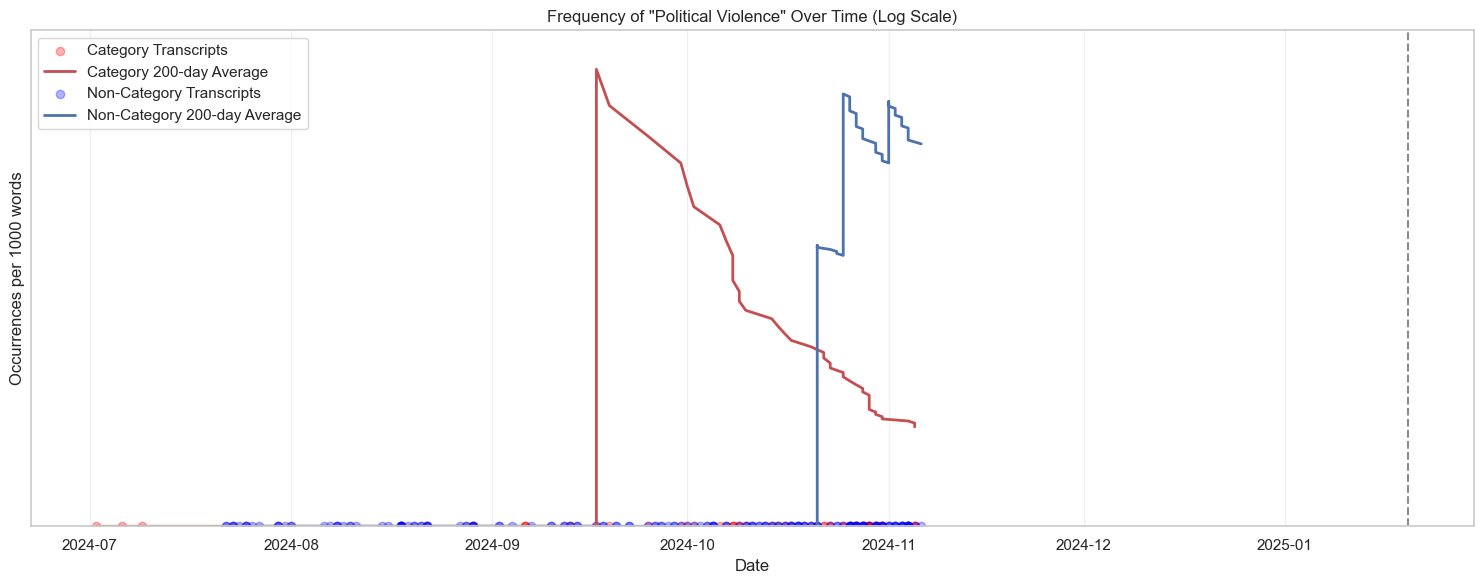


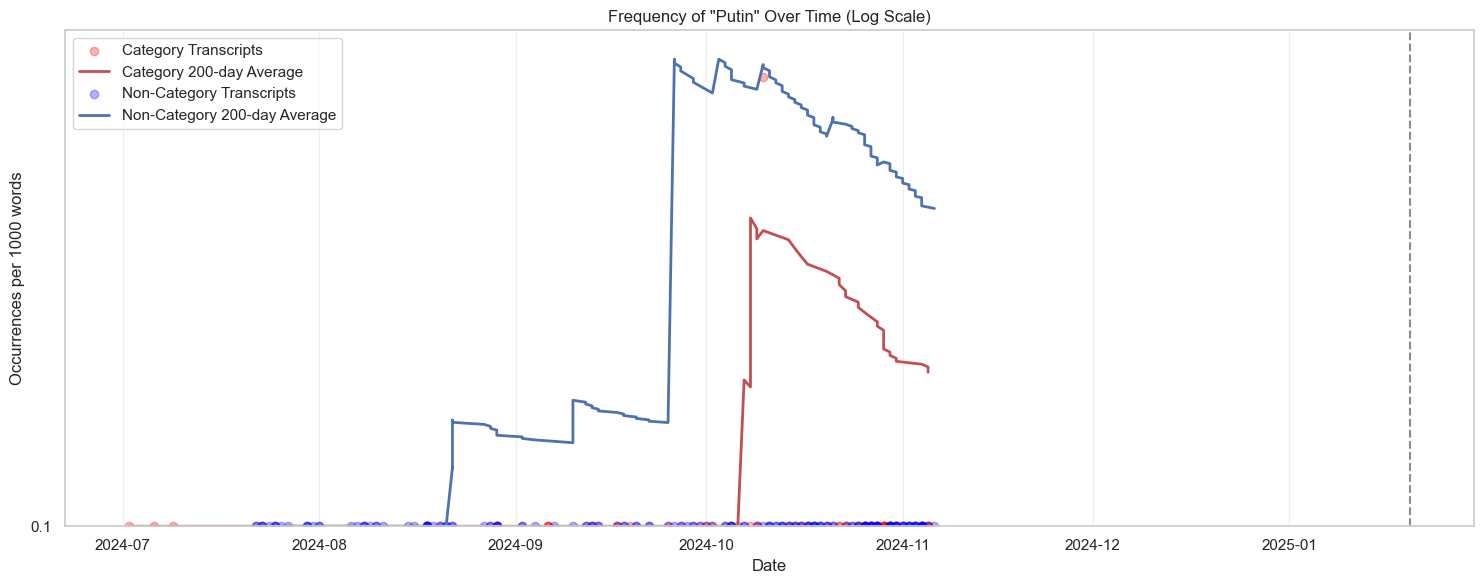


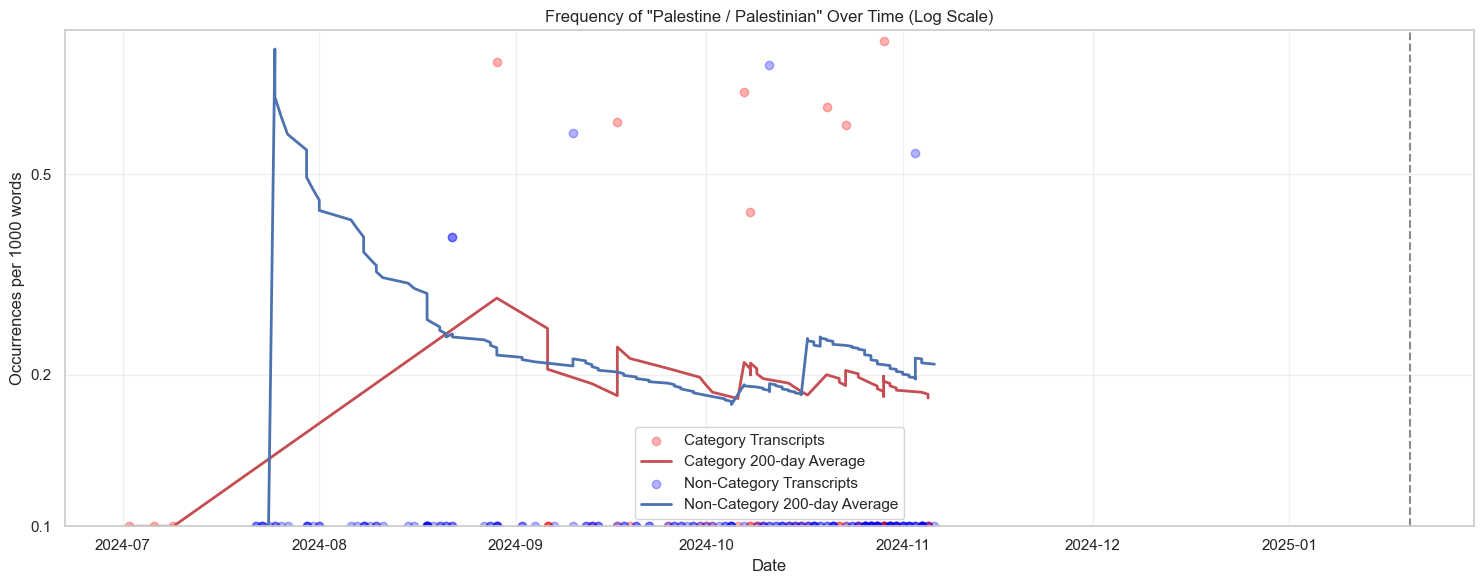


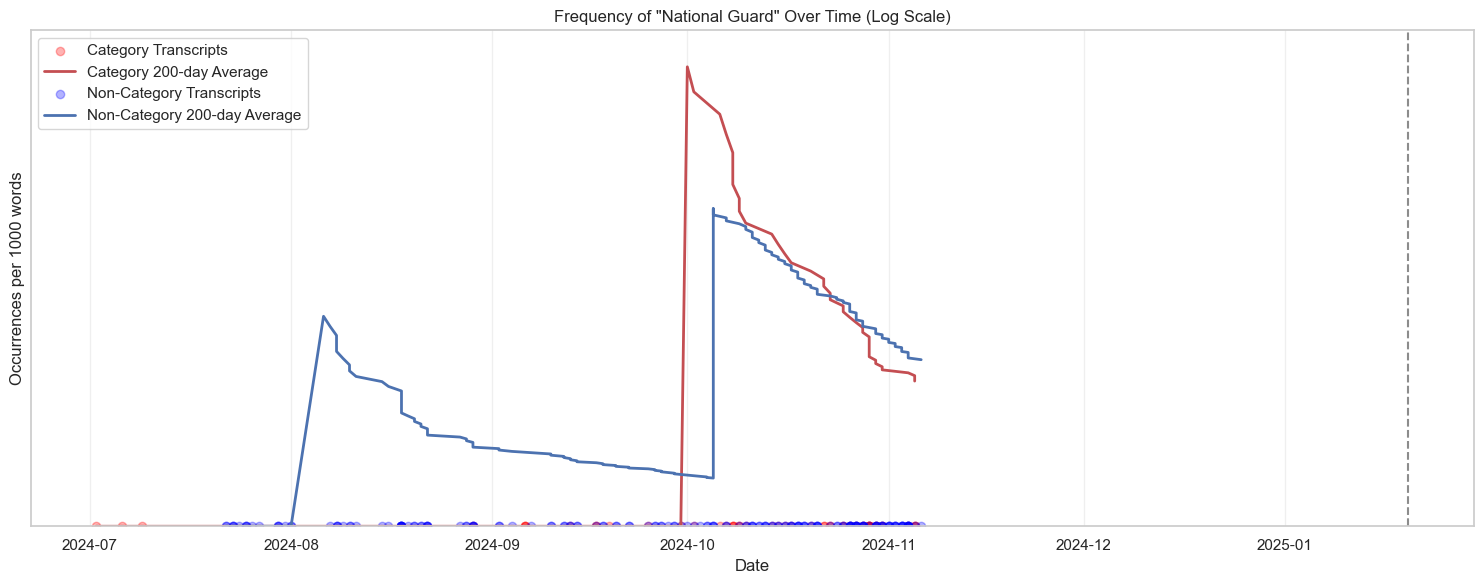


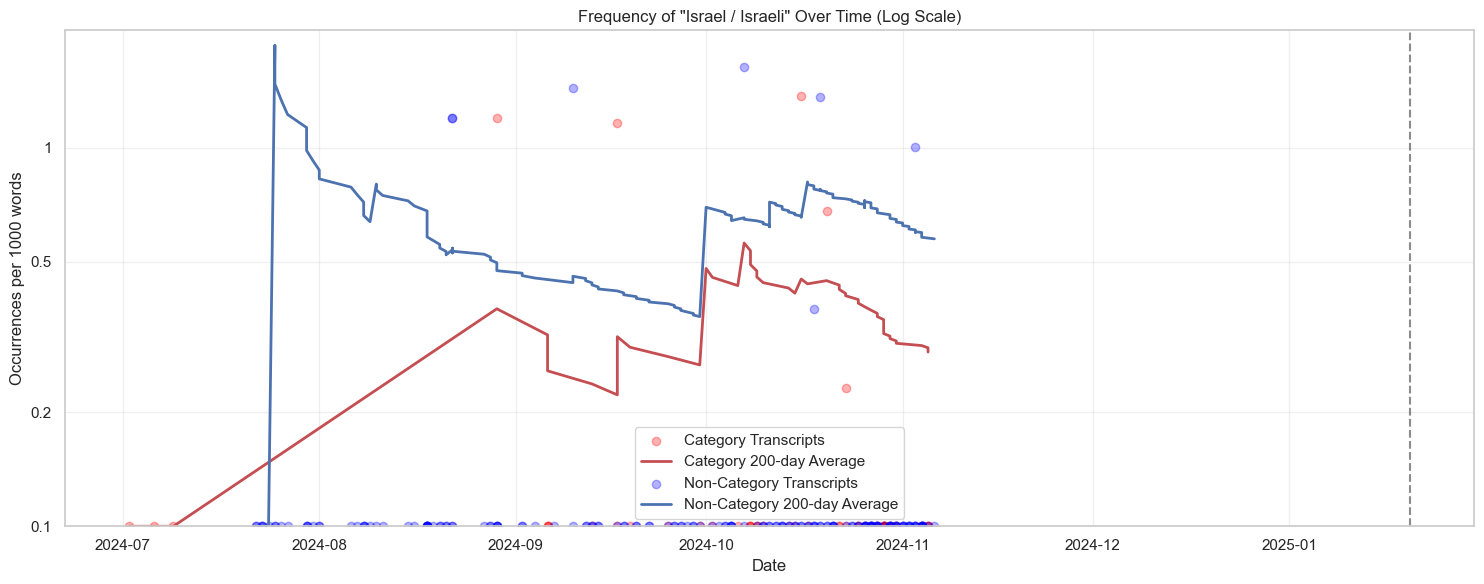


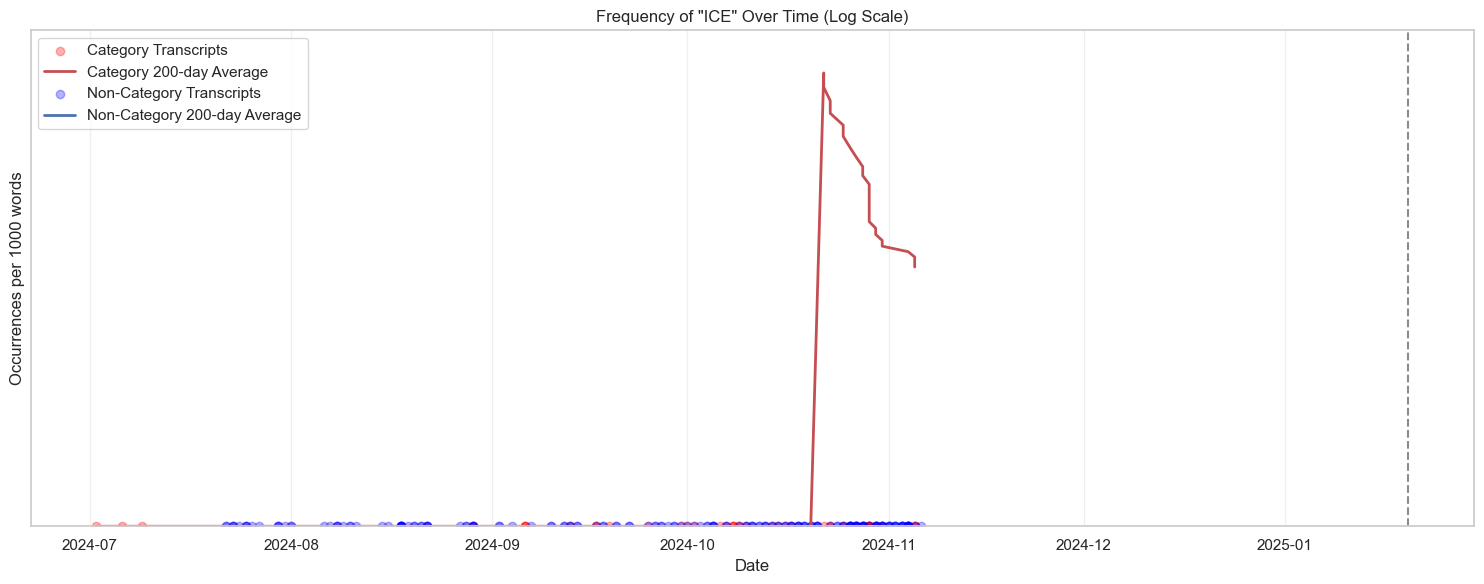


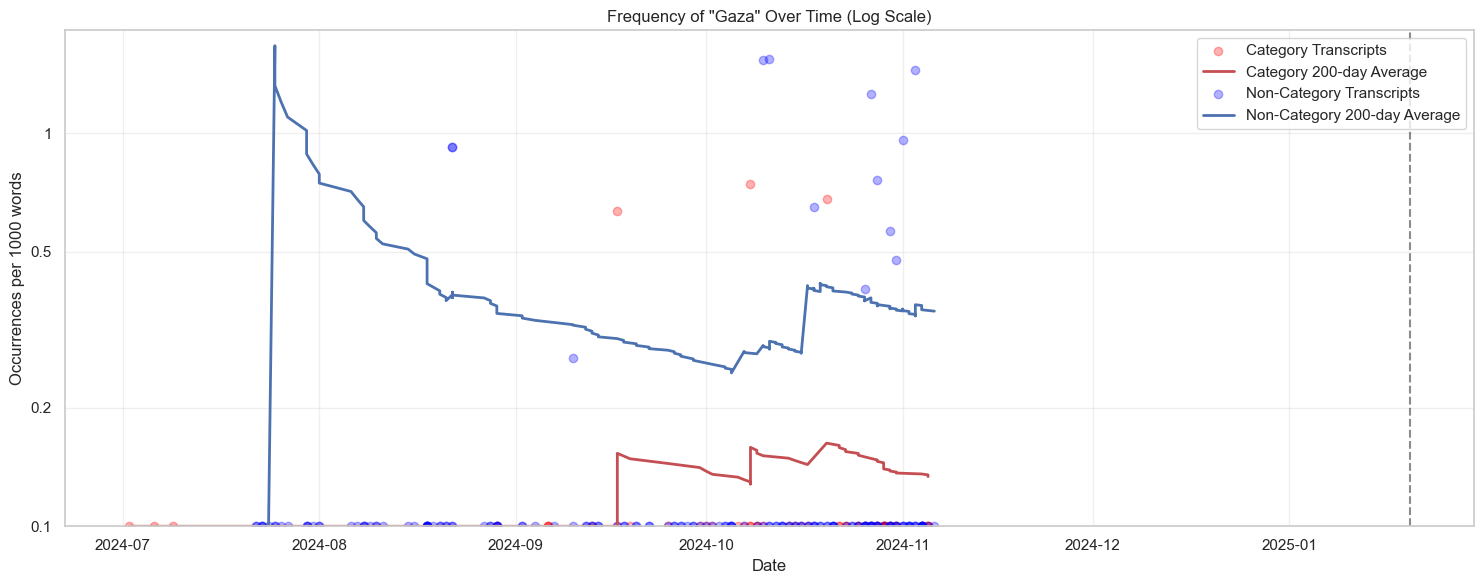


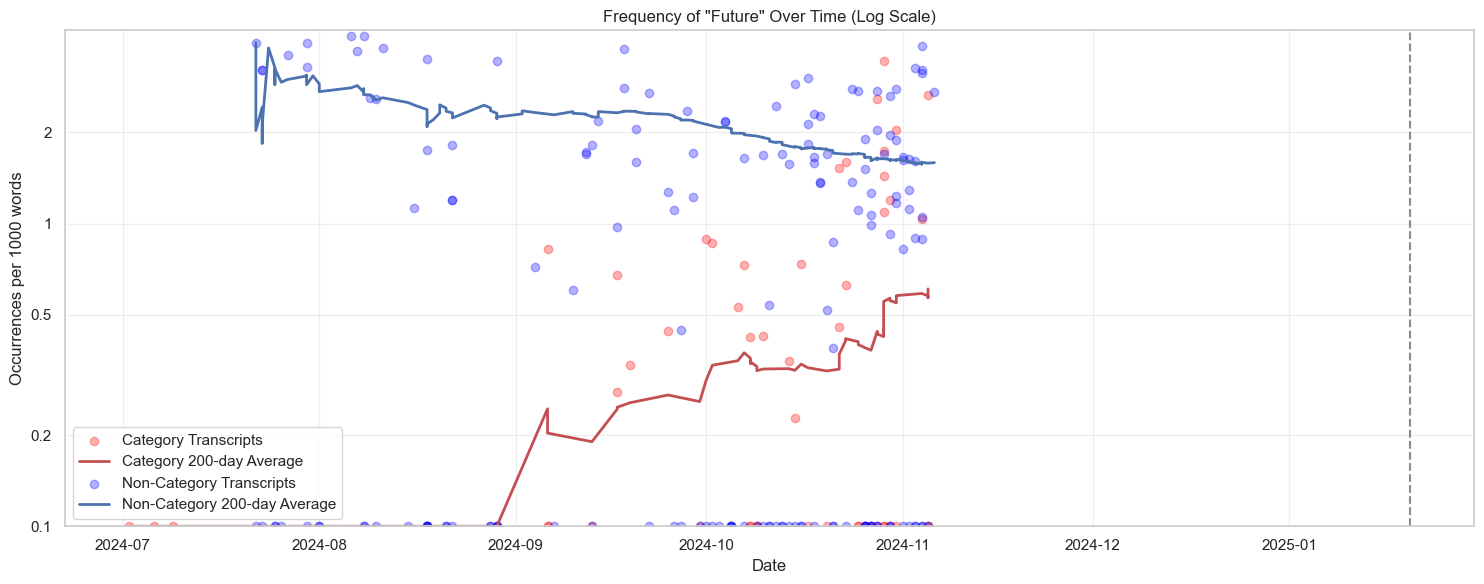


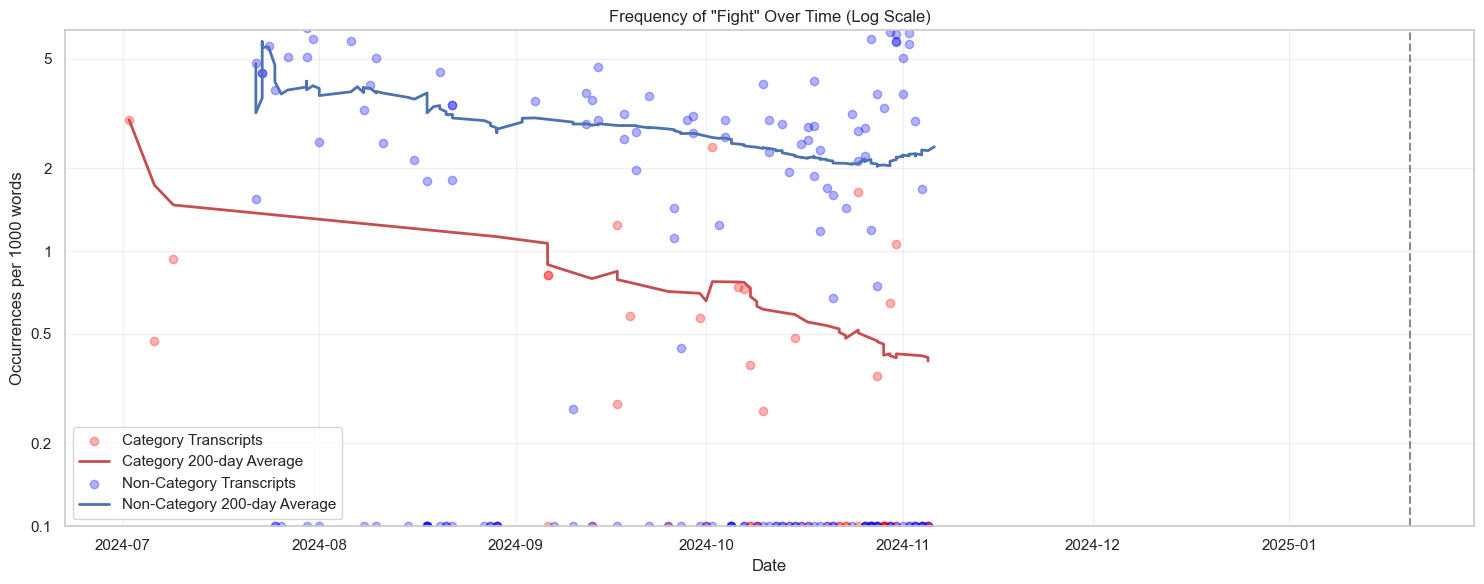


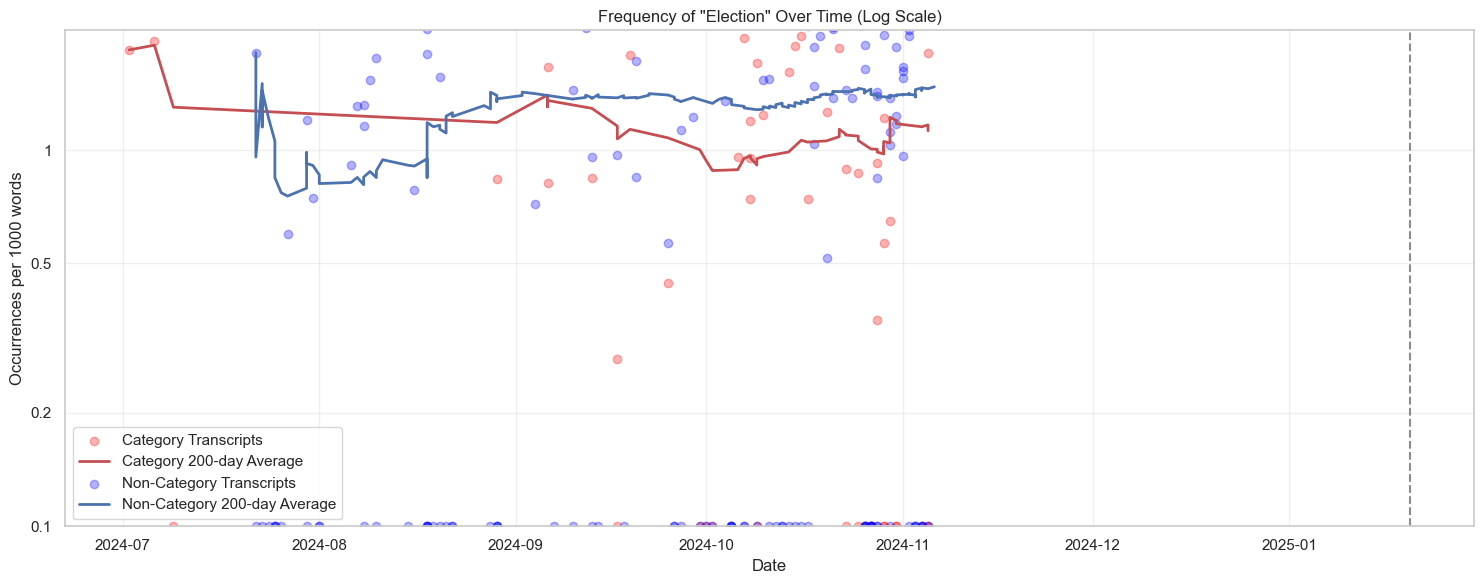


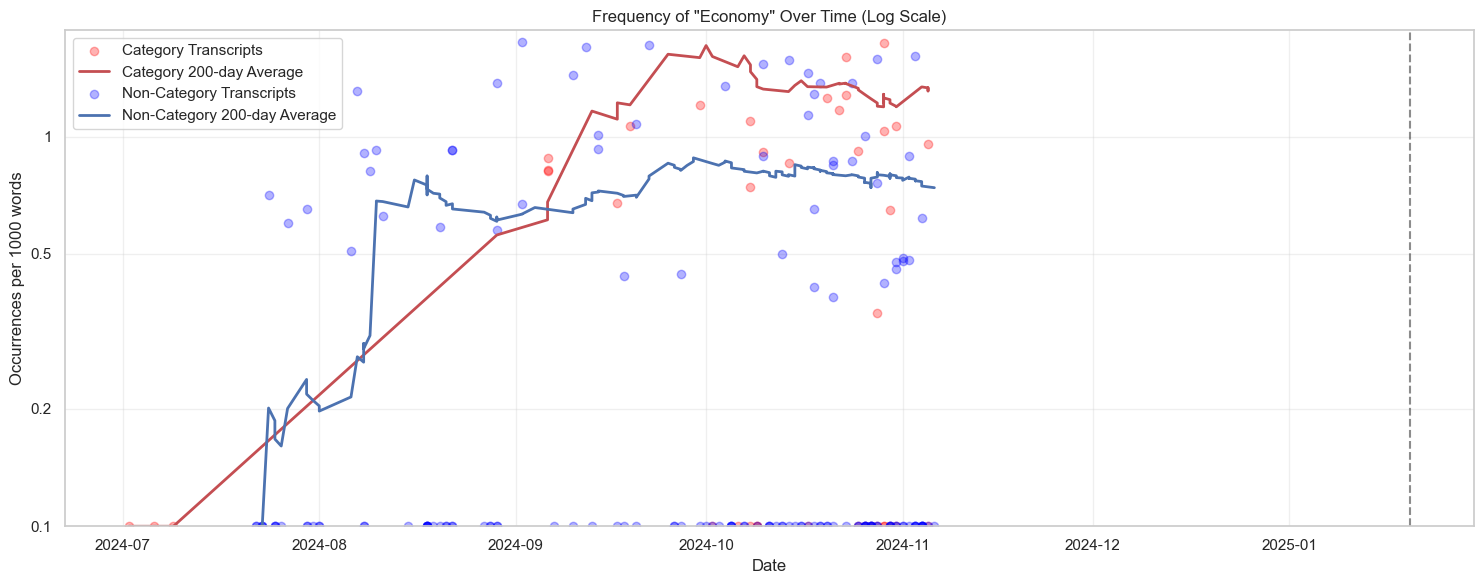


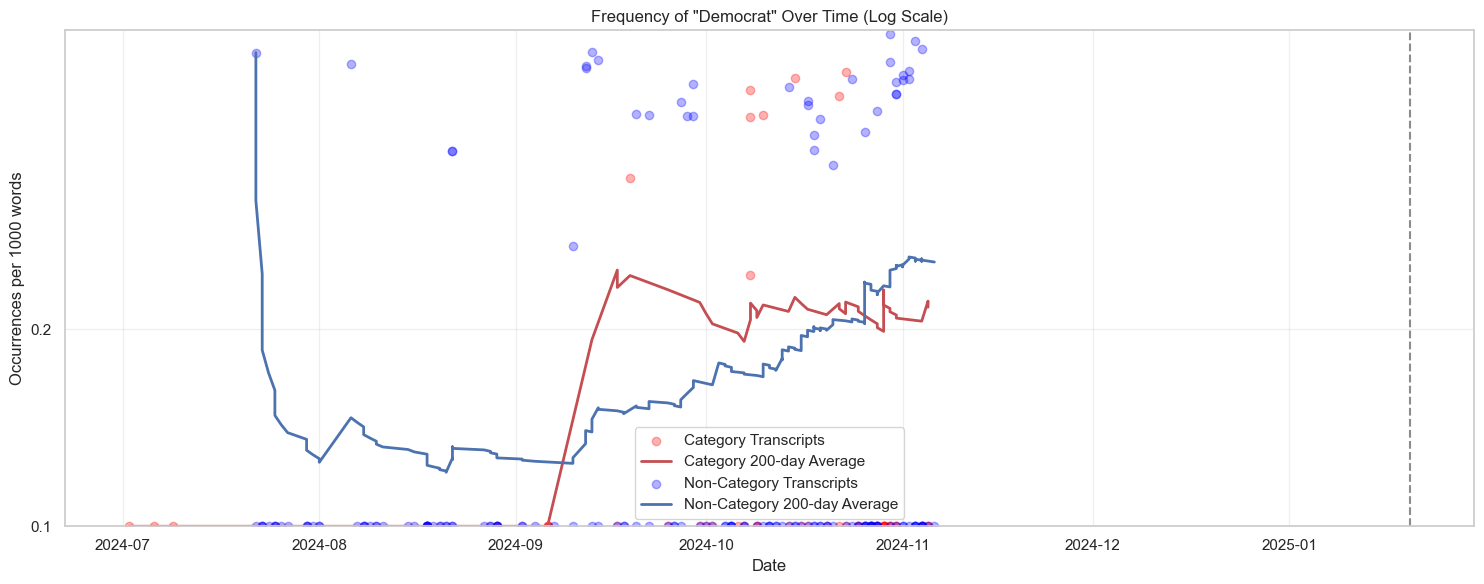


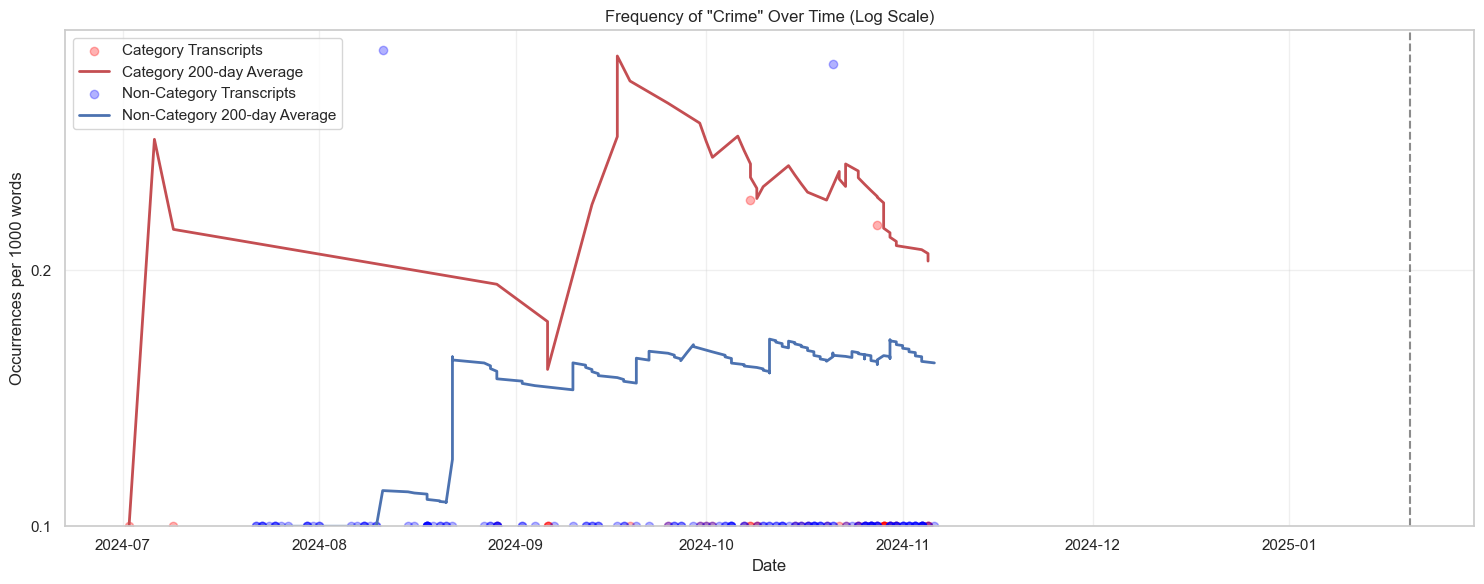


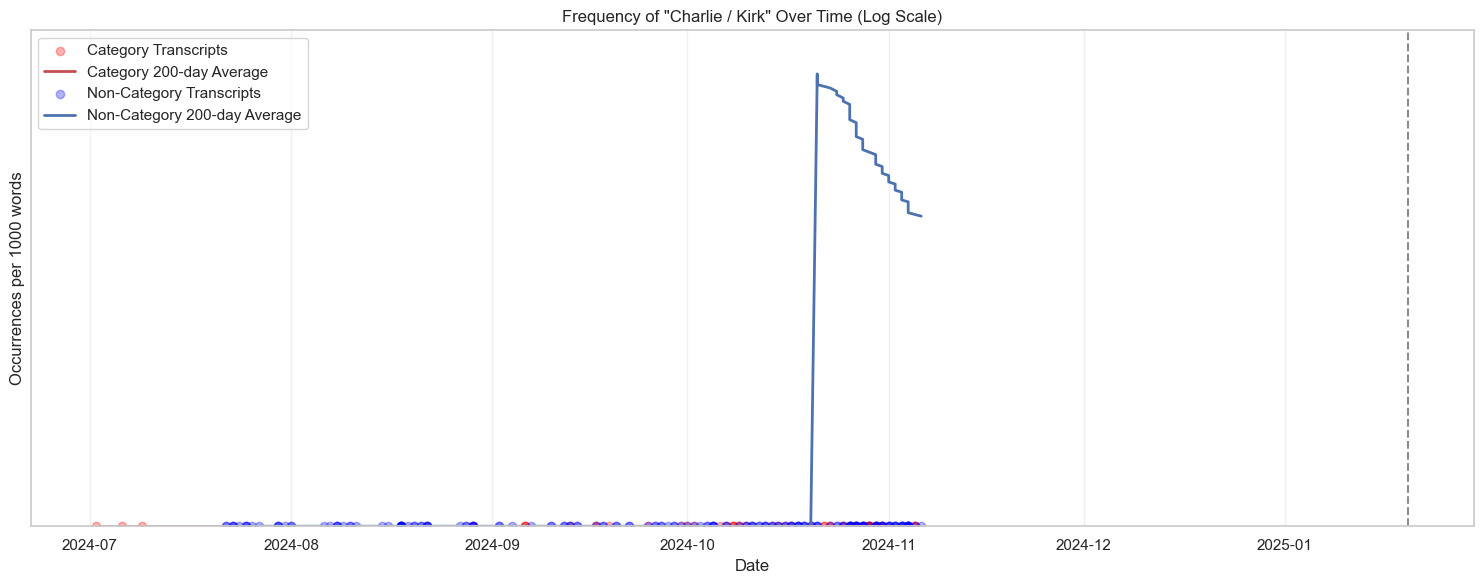


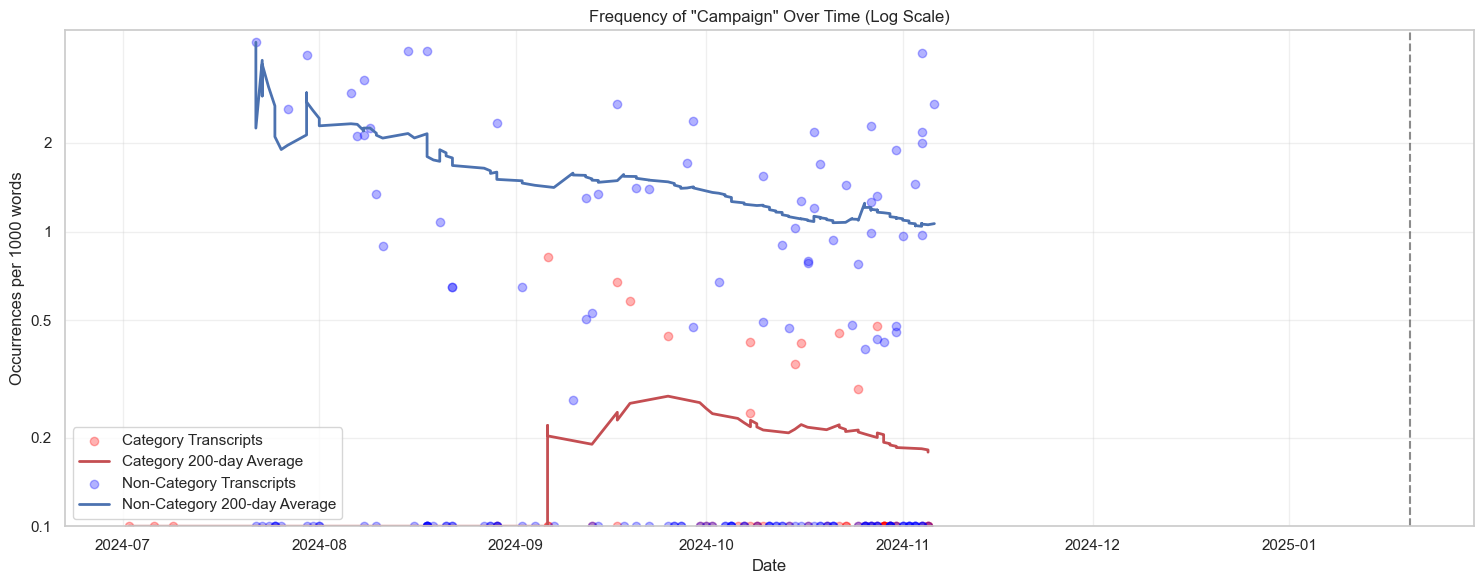


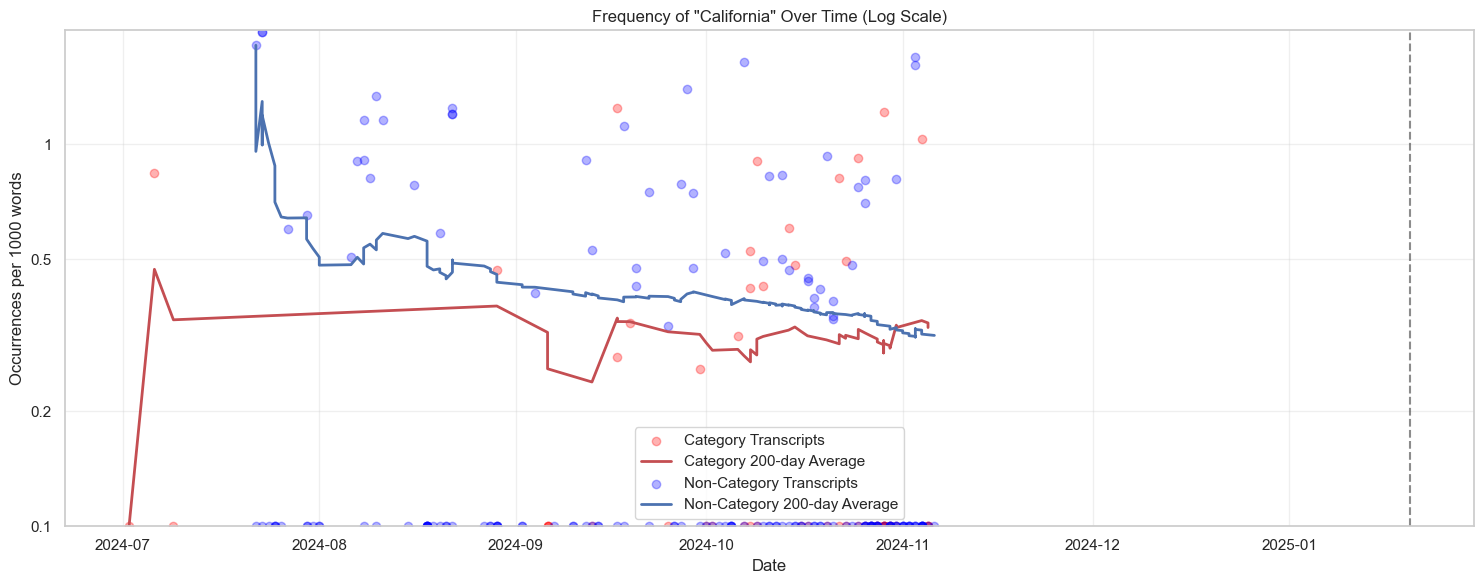


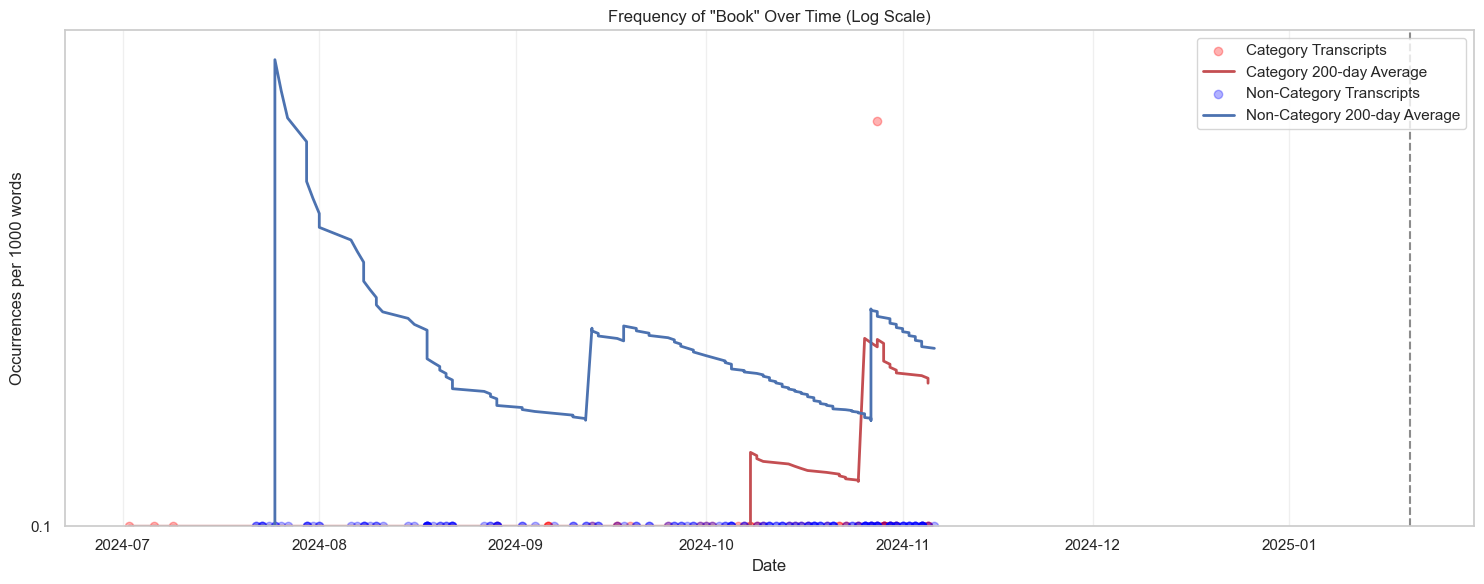


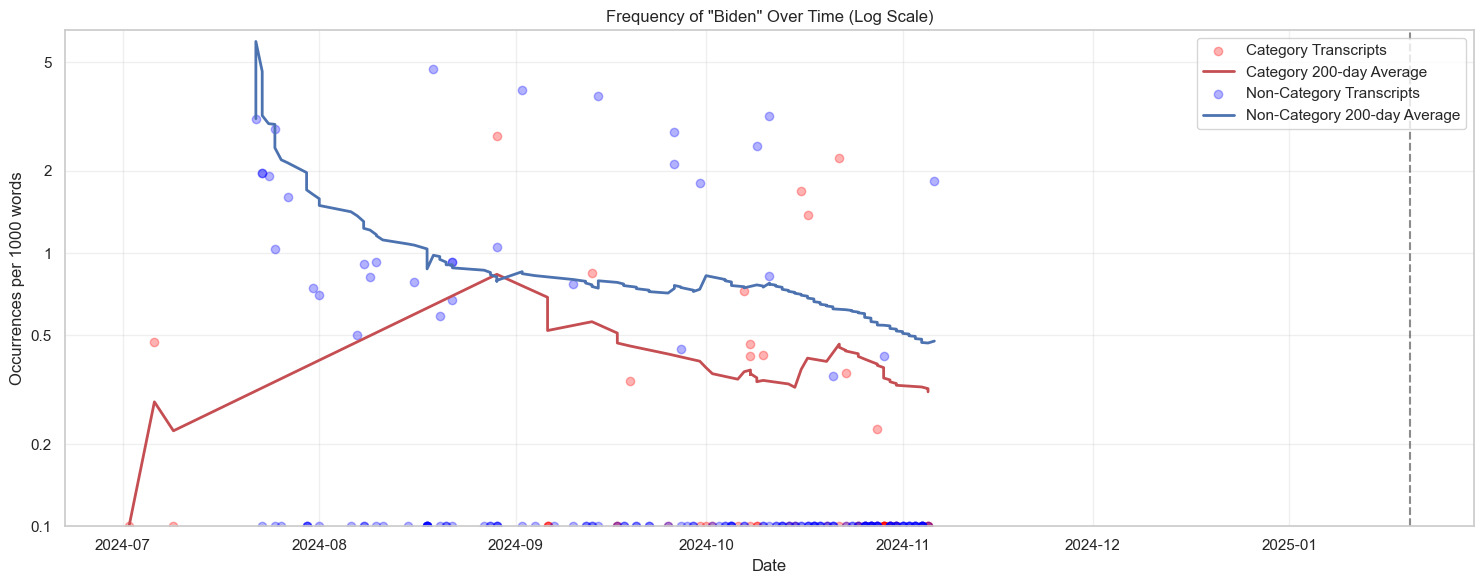


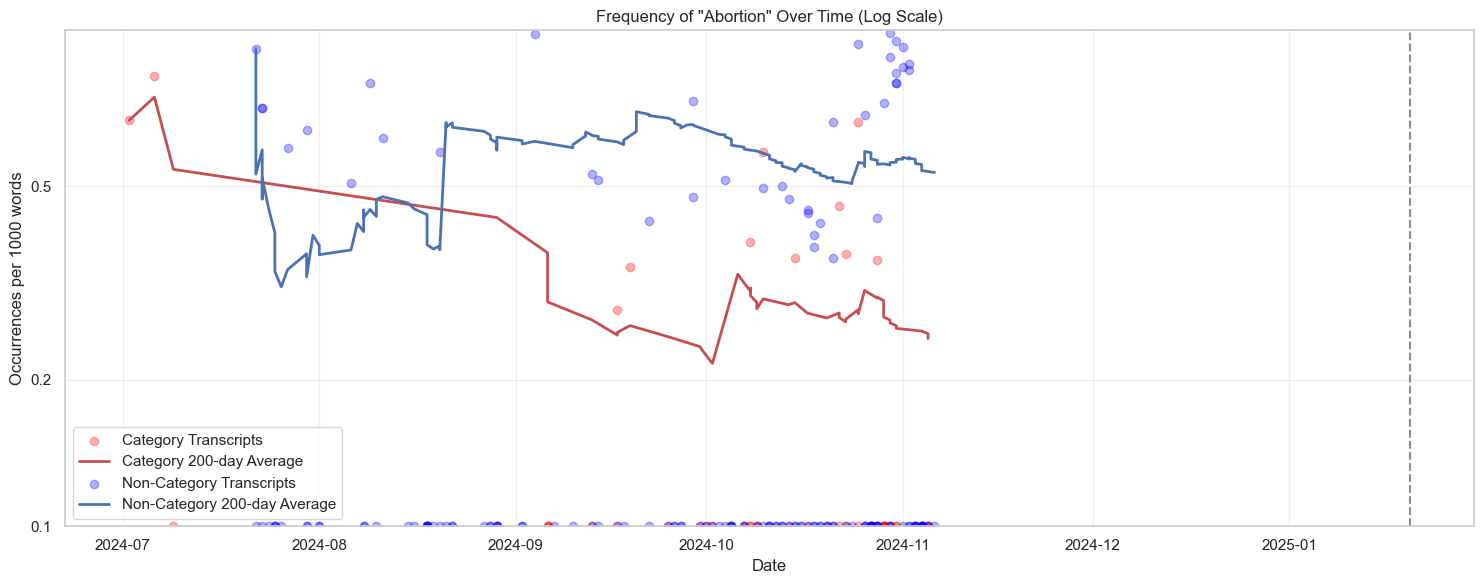

/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:200: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(np.log10(0.1), np.log10(ymax + 0.1))



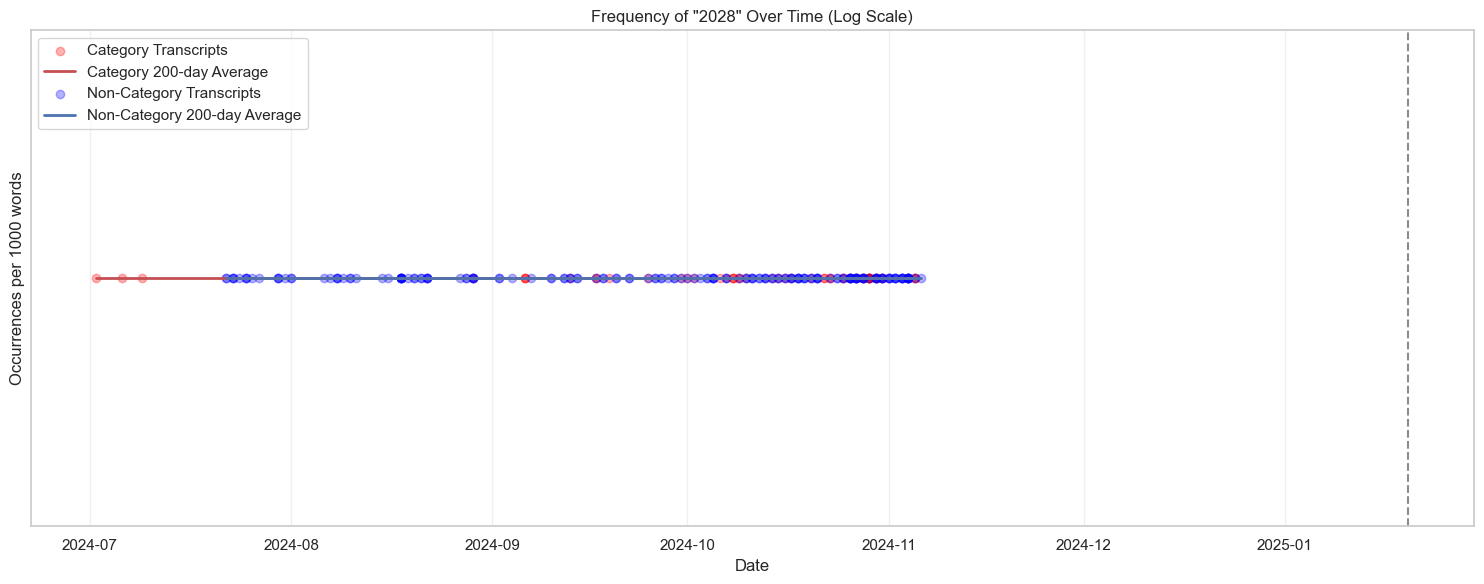

In [4]:

plot_phrase_frequency_over_time_all(df_category, df_non_category, SEARCH_PHRASES, log_scale=True, window=200, start_date = datetime(2024,6,1))

In [5]:
analyze_files_phrase_occurrences(df[df['file'].str.contains('maddow')], SEARCH_PHRASES)


Found 2 matching files:

  2019-07-11_rachel_maddow.txt
  2020-10-15_rachel_maddow.txt


Phrase occurrences across selected files (sorted by total occurrences):


/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phrase_rows['Total'] = phrase_rows.sum(axis=1)


,2019-07-11_rachel_maddow.txt,2020-10-15_rachel_maddow.txt
Word Count,2076,3354
Election,2,12
Biden,0,6
Crime,6,0
Trump,0,4
Fight,0,4
Campaign,2,1
Future,1,0
ICE,1,0
Democrat,1,0



Summary:
Total files processed: 2
Total word count: 5,430


Expected length from category data: 2453 words


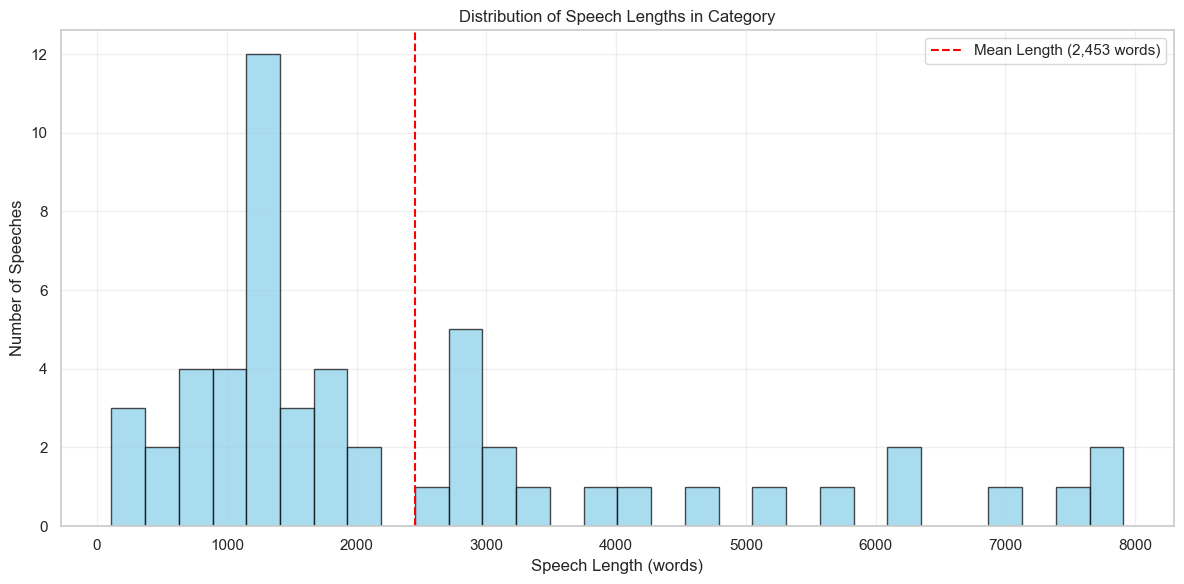

In [6]:
plot_length_distribution(df_category)

## Poisson Predictions

The most naive approach is to use the past frequency of a phrase over a given time period to forecast the probability of a phrase occurring during the expected length of a future speech. Using the Poisson distribution, we assume each word is independent and identically distributed. This allows us to compute threshold probabilities for a phrase occurring a given number of times, which can be compared to the prediction market's implied probability. However, this approach does not account for the clear dependence between words in a speech. This approach can still be useful for analyzing mentions where mostly independent occurrences might be expected (America, God, etc.) 

In [7]:
maddow_word_count = df_category[df_category['file'] == '2020-10-15_rachel_maddow.txt']['text_length'].mean()
maddow_word_count

np.float64(3354.0)

In [12]:
# Calculate predictions from different data sources
predictions_all = calculate_poisson_predictions(df, maddow_word_count, SEARCH_PHRASES)
predictions_interviews = calculate_poisson_predictions(df_category, maddow_word_count, SEARCH_PHRASES)

print("Predictions based on all appearances:")
display(format_prediction_table(predictions_all))

print("\nPredictions based on interviews:")
display(format_prediction_table(predictions_interviews))

Predictions based on all appearances:


,Phrase,Expected,Historical Rate,Total Historical,P(≥1)
4,Trump,10.26,3.060,1219,100.0%
13,Fight,7.24,2.159,860,99.9%
14,Election,4.79,1.428,569,99.2%
12,Future,4.43,1.320,526,98.8%
15,Economy,3.18,0.949,378,95.9%
19,Campaign,2.01,0.600,239,86.6%
23,Abortion,1.56,0.464,185,78.9%
22,Biden,1.11,0.331,132,67.1%
20,California,1.03,0.306,122,64.2%
9,Israel / Israeli,0.71,0.211,84,50.7%



Predictions based on interviews:


,Phrase,Expected,Historical Rate,Total Historical,P(≥1)
4,Trump,7.49,2.234,296,99.9%
15,Economy,4.00,1.193,158,98.2%
14,Election,3.42,1.019,135,96.7%
12,Future,1.16,0.347,46,68.8%
13,Fight,1.16,0.347,46,68.8%
22,Biden,0.94,0.279,37,60.8%
20,California,0.78,0.234,31,54.4%
23,Abortion,0.76,0.226,30,53.2%
17,Crime,0.73,0.219,29,52.0%
9,Israel / Israeli,0.58,0.174,23,44.1%


## Negative Binomial 

A more general model that accounts for overdispersion. The dispersion parameter r is estimated using the method of moments, and it controls how much extra variance there is compared to a Poisson distribution. As r approaches infinity, the negative binomial converges to a Poisson distribution (in practice we use r=100 to approximate this). Values closer to 0 indicate that the data is overdispersed.

In [ ]:

# Calculate predictions using both models
# avg_speech_length = df['text_length'].mean()
avg_speech_length = 3354

print("Negative Binomial Predictions based on all appearances:")
nb_predictions = calculate_negative_binomial_predictions(df, avg_speech_length, SEARCH_PHRASES)
display(format_prediction_table(nb_predictions))

print("Negative Binomial Predictions based on interviews:")
nb_predictions_interviews = calculate_negative_binomial_predictions(df_category, avg_speech_length, SEARCH_PHRASES)
display(format_prediction_table(nb_predictions_interviews))

Negative Binomial Predictions based on all appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1),P(≥3)
4,Trump,10.26,0.71,158.25,85.7%,0.686
13,Fight,7.24,0.67,85.51,80.9%,0.602
14,Election,4.79,0.84,31.94,79.9%,0.541
12,Future,4.43,0.57,38.62,71.1%,0.463
15,Economy,3.18,0.52,22.76,63.9%,0.373
19,Campaign,2.01,0.10,50.31,26.3%,0.156
23,Abortion,1.56,0.22,12.62,36.8%,0.182
22,Biden,1.11,0.11,12.47,23.1%,0.117
20,California,1.03,1.18,1.92,52.2%,0.127
9,Israel / Israeli,0.71,0.10,65.56,18.8%,0.083


Negative Binomial Predictions based on interviews:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1),P(≥3)
4,Trump,7.49,0.86,72.74,85.9%,0.658
15,Economy,4.00,0.61,30.32,70.8%,0.447
14,Election,3.42,0.57,23.99,66.9%,0.400
12,Future,1.16,0.26,6.40,35.7%,0.150
13,Fight,1.16,0.50,3.89,45.1%,0.160
22,Biden,0.94,0.33,3.62,35.7%,0.125
20,California,0.78,0.51,1.99,37.9%,0.098
23,Abortion,0.76,0.99,1.34,43.1%,0.081
17,Crime,0.73,0.37,2.20,33.2%,0.094
9,Israel / Israeli,0.58,0.10,3.98,17.5%,0.071


In [ ]:
avg_speech_length



np.float64(1717.0086206896551)

## Recent Usage in context

In [ ]:
get_recent_contexts_all(df, SEARCH_PHRASES, n=10)


=== Recent usage of 'JD / Vance' ===

Date: 2024-09-29 (remarks)
Context: ...t, I think, was quite clear in our debate. Did you all see the debate?  You saw you saw the debate. You saw the debate. Yeah, yeah. And in two days, I know we will cheer on Coach Walz when he debates JD Vance. Yeah. But listen, also, their debate should not be the last word.

I'm trying to debate Donald Trump again, and I think he should debate again. The American people have a right to hear us disc...

Date: 2024-09-29 (remarks)
Context: ...I think, was quite clear in our debate. Did you all see the debate?  You saw you saw the debate. You saw the debate. Yeah, yeah. And in two days, I know we will cheer on Coach Walz when he debates JD Vance. Yeah. But listen, also, their debate should not be the last word.

I'm trying to debate Donald Trump again, and I think he should debate again. The American people have a right to hear us discuss the...

Date: 2024-09-10 (debate)
Context: ...sed disdain for members of 

## Per-Speech Frequencies


In [ ]:
len(df_category[df_category['text_length'] > 3000])

14

In [ ]:
get_per_appearance_frequency({'all': df, CATEGORY_OF_INTEREST: df_category, f'{CATEGORY_OF_INTEREST} over 3000 words': df_category[df_category['text_length'] > 3000], 'maddow': df[df['file'].str.contains('maddow')]}, SEARCH_PHRASES)


Percentage of Appearances Containing Each Phrase:


,all,interview,interview over 3000 words,maddow
Phrase,,,,
Election,61.6%,68.5%,92.9%,100.0%
Trump,58.2%,72.2%,92.9%,50.0%
Future,57.8%,51.9%,64.3%,50.0%
Fight,50.9%,37.0%,71.4%,50.0%
Economy,45.3%,63.0%,78.6%,0.0%
Campaign,36.2%,24.1%,57.1%,100.0%
Abortion,32.3%,24.1%,64.3%,0.0%
California,31.5%,37.0%,78.6%,50.0%
Democrat,26.7%,24.1%,42.9%,50.0%


In [ ]:
# Filter for the specific file and show phrase occurrences
specific_file = "2020-10-15_rachel_maddow"
file_data = df[df['file'].str.contains(specific_file, na=False)]

if not file_data.empty:
    # Get all phrase columns (excluding metadata columns)
    phrase_cols = [col for col in df.columns if col in SEARCH_PHRASES.keys()]
    
    # Create a summary of phrase occurrences for this file
    file_summary = file_data[['file'] + phrase_cols].copy()
    
    # Transpose to show phrases as rows
    phrase_occurrences = file_summary.set_index('file').T
    phrase_occurrences.columns = ['Occurrences']
    phrase_occurrences = phrase_occurrences.sort_values('Occurrences', ascending=False)
    
    print(f"Phrase occurrences in {specific_file}:")
    display(phrase_occurrences)
    
    # Also show file metadata
    print(f"\nFile details:")
    print(f"Text length: {file_data['text_length'].iloc[0]:,} words")
    print(f"Category: {file_data['category'].iloc[0]}")
    print(f"Date: {file_data['date'].iloc[0]}")
else:
    print(f"No file found containing '{specific_file}' in the filename")


Phrase occurrences in 2020-10-15_rachel_maddow:


,Occurrences
Joe / Biden,26
Election,12
Democracy,5
Fight,4
Attorney General,1
Education,1
Doug,0
Fundamental,0
Beautiful Bill,0
Charlie / Kirk,0



File details:
Text length: 3,354 words
Category: interview
Date: 2020-10-15 00:00:00
